# Stochastic Disturbance in ANDES

This notebook demonstrates the implementation of stochastic disturbance in ANDES using the pertubation file.
The disturbance happens at ***EVERY*** time step, and you can play with the simulated system just as you would with a normal ANDES simulation in the perturbation file.

In [1]:
import andes

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
!andes misc --version

Python  3.12.0
andes   1.9.3
numpy   2.0.2
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.2
numba   0.60.0


In [4]:
andes.config_logger(stream_level=20)

Load the case, but don’t set it up yet as we need to add some devices.

In [5]:
ss = andes.load(andes.get_case('ieee14/ieee14_full.xlsx'),
                setup=True,
                no_output=True,
                default_config=True,
                pert='./pert.py')

Working directory: "/Users/jinningwang/work/demo/demo/andes_stochastic"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Parsing input file "/Users/jinningwang/work/miniconda3/envs/amsre/lib/python3.12/site-packages/andes/cases/ieee14/ieee14_full.xlsx"...
Input file parsed in 0.2654 seconds.
System internal structure set up in 0.0158 seconds.


There are some settings that require attention.

In [6]:
# use constant power model for PQ, we need to change the power by setting PQ.Ppf
# and it is only effective in constant power mode

ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

Solve the power flow.

In [7]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0027 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.964193111e-12
Converged in 4 iterations in 0.0037 seconds.


True

Init the TDS.

In [8]:
_ = ss.TDS.init()

Perturbation file "./pert.py" loaded.
Initialization for dynamics completed in 0.0175 seconds.
Initialization was successful.


Then, we can run the simulation with pertubation.

- More details about Pertubation file can be found at https://docs.andes.app/en/latest/getting_started/formats/disturbance.html#perturbation-file
- Do a load change in ANDES: https://docs.andes.app/en/latest/_examples/ex9.html

In [9]:
ss.TDS.config.criteria = 0  # turn off the criteria check for testing purpose
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=20.00 sec completed in 0.6754 seconds.


True

In the pert file, we deine a random load change and it will happen at ***EVERY*** time step.
Check the source file ``pert.py`` for the details of the perturbation.

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='Time [s]', ylabel='Bus Volt. [p.u.]'>)

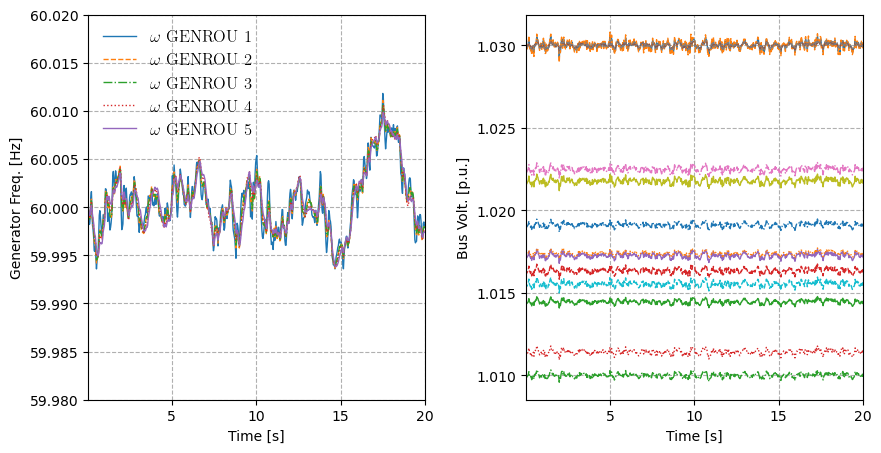

In [18]:
plt.style.use('default')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.3)

ss.TDS.plt.plot(ss.GENROU.omega,
                ytimes=ss.config.freq,
                ymin=59.98, ymax=60.02,
                grid=True, show=False,
                ylabel='Generator Freq. [Hz]',
                fig=fig, ax=ax[0])
ss.TDS.plt.plot(ss.Bus.v,
                ylabel='Bus Volt. [p.u.]',
                grid=True, show=False,
                fig=fig, ax=ax[1])